<a href="https://colab.research.google.com/github/FANG87003/2025_ML_hws/blob/main/hw4-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 4-1

## 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from ipywidgets import interact_manual

## 顯示中文

In [3]:
# 下載思源黑體字型（支援中文）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 重新載入字型
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

## 一、資料預處理

In [4]:
# 下載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
# 顯示資料形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 資料常模化 (normalization)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

### One-hot encoding

In [7]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### 顯示三張訓練圖片與真實標籤

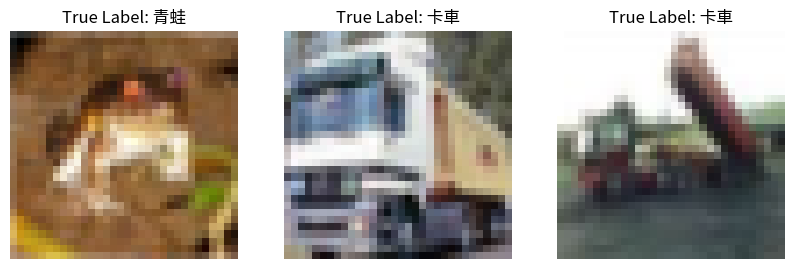

In [8]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"True Label: {class_name[y_train[i].item()]}")
    plt.axis('off')
plt.show()

## 二、建立神經網路模型

In [9]:
model = Sequential()

### 第一層：卷積層 (16 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* 彩色圖片	3 通道（RGB）
* (32, 32, 16)
* 卷積層參數 = (Filter高 × Filter寬 × 前層輸入通道數 + 偏值) × 本層通道數





In [10]:
model.add(Conv2D(16, (3,3), padding='same',
        input_shape=(32,32,3),
        activation='relu'))  # (3x3x3+1)x16 = 448

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 第二層：卷積層 (16 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* (32, 32, 16)
* 前一層輸出 16 個通道
* 本層 16 通道

In [11]:
model.add(Conv2D(16, (3,3), padding='same',
        activation='relu',))  # (3x3x16+1)x16 = 2320

### 第三層：池化層
* 圖片尺寸為	16x16
* (16, 16, 16)
* 保留前一層 16 個通道

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第四層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為 16x16
* (16, 16, 32)
* 前一層輸出 16 個通道
* 本層 32 通道


In [13]:
model.add(Conv2D(32, (3,3), padding='same',
        activation='relu'))  # (3x3x16+1)x32 = 4640

### 第五層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為 16x16
* (16, 16, 32)
* 前一層輸出 32 個通道
* 本層 32 通道

In [14]:
model.add(Conv2D(32, (3,3), padding='same',
        activation='relu'))  # (3x3x32+1)x32 = 9248

### 第六層：池化層
* 圖片尺寸為	8x8
* (8, 8, 32)
* 保留前一層 32 個通道

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第七層：拉平層
* (8, 8, 32) → 2048

In [16]:
model.add(Flatten())

### 第八層：全連接層 (10 個神經元)
* 10 個神經元對應 CIFAR-10 的 10 類別
* 每個神經元連接前一層的 2048 個輸入，共有 20480 個權重 + 10 個偏值 = 20490 個參數。

In [17]:
model.add(Dense(10, activation='softmax')) # 2048x10+10 = 20490

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

## 三、訓練神經網路模型

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [20]:
train_history = model.fit(
    x_train, y_train_oh,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    verbose=2)

Epoch 1/20
313/313 - 10s - 32ms/step - accuracy: 0.4028 - loss: 1.6580 - val_accuracy: 0.4692 - val_loss: 1.4828
Epoch 2/20
313/313 - 2s - 6ms/step - accuracy: 0.5326 - loss: 1.3076 - val_accuracy: 0.5629 - val_loss: 1.2468
Epoch 3/20
313/313 - 2s - 7ms/step - accuracy: 0.6058 - loss: 1.1345 - val_accuracy: 0.6136 - val_loss: 1.1132
Epoch 4/20
313/313 - 2s - 6ms/step - accuracy: 0.6421 - loss: 1.0226 - val_accuracy: 0.6510 - val_loss: 1.0053
Epoch 5/20
313/313 - 2s - 8ms/step - accuracy: 0.6672 - loss: 0.9522 - val_accuracy: 0.6589 - val_loss: 0.9802
Epoch 6/20
313/313 - 2s - 6ms/step - accuracy: 0.6883 - loss: 0.8951 - val_accuracy: 0.6692 - val_loss: 0.9412
Epoch 7/20
313/313 - 2s - 6ms/step - accuracy: 0.7016 - loss: 0.8579 - val_accuracy: 0.6820 - val_loss: 0.9232
Epoch 8/20
313/313 - 3s - 9ms/step - accuracy: 0.7187 - loss: 0.8100 - val_accuracy: 0.6797 - val_loss: 0.9159
Epoch 9/20
313/313 - 2s - 6ms/step - accuracy: 0.7293 - loss: 0.7803 - val_accuracy: 0.6909 - val_loss: 0.9002

## 四、顯示 loss & accuracy 折線圖

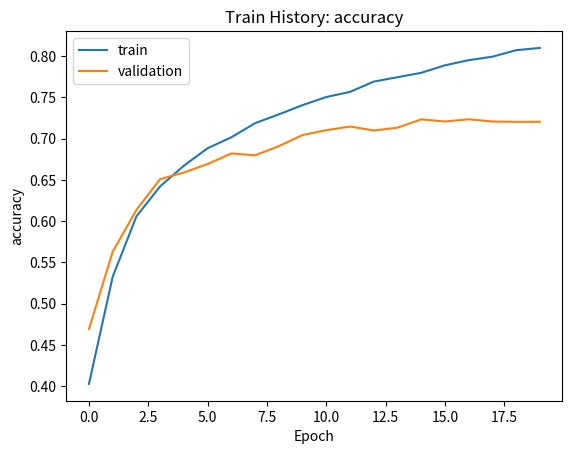

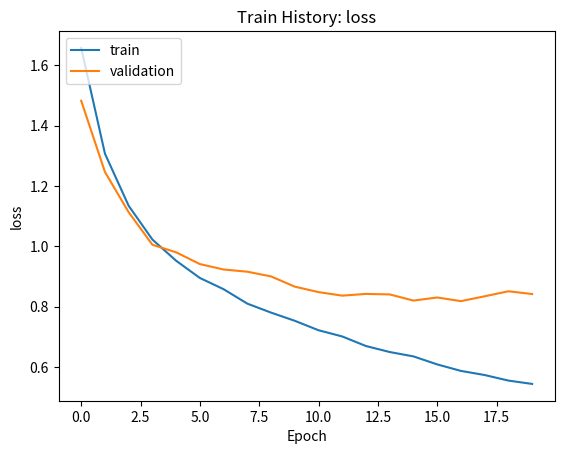

In [21]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {train}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## 五、評估模型準確率

In [22]:
scores = model.evaluate(x_test, y_test_oh)
print(f"accuracy: {scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7173 - loss: 0.8518
accuracy: 71.69%


## 六、預測

In [23]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [24]:
predictions.shape

(10000, 10)

In [25]:
predictions

array([[3.63516767e-04, 8.44208524e-04, 1.41210636e-04, ...,
        1.54002482e-05, 1.00227250e-02, 3.20666470e-03],
       [1.89678685e-04, 2.30156630e-03, 1.32397034e-07, ...,
        5.42044243e-10, 9.97497737e-01, 1.01622272e-05],
       [4.64480091e-03, 6.07211411e-01, 1.97686633e-04, ...,
        1.23505903e-04, 3.63740206e-01, 2.26553343e-02],
       ...,
       [1.04710838e-04, 3.72016461e-06, 1.13233728e-02, ...,
        2.60011218e-02, 1.84167555e-04, 5.71997880e-05],
       [1.90018360e-02, 8.41318548e-01, 1.98896658e-02, ...,
        1.75091671e-03, 5.67284820e-04, 4.08699503e-03],
       [1.74167258e-06, 5.57543535e-06, 1.92609805e-05, ...,
        9.96531963e-01, 9.20288645e-09, 1.18420544e-08]], dtype=float32)

In [26]:
predicted_classes = np.argmax(predictions, axis=1)

## 七、顯示圖片與標籤名稱

In [27]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, true_labels, pred_labels, label_names, idx, num):
  plt.figure(figsize=(6, 7))
  if num > 25: num = 25
  for i in range(num):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx + i])

    true_idx = np.squeeze(true_labels[idx + i])
    pred_idx = np.squeeze(pred_labels[idx + i])

    true_name = label_names[true_idx]
    pred_name = label_names[pred_idx]

    plt.title(f'True: {true_name}\nPred: {pred_name}', fontsize=10)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

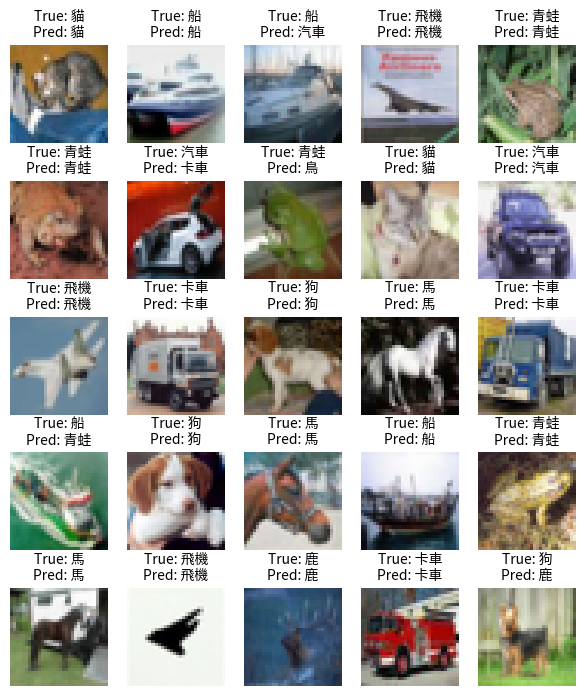

In [28]:
plot_images_labels_prediction(x_test, y_test, predicted_classes, class_name, idx=0, num=25)

## 八、混淆矩陣 (Confusion Matrix)

In [29]:
import pandas as pd

pd.crosstab(np.squeeze(y_test), predicted_classes, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,761,18,45,17,17,6,8,17,71,40
1,26,867,3,6,1,1,7,1,15,73
2,67,8,560,70,77,68,73,52,15,10
3,30,15,71,519,56,143,73,59,18,16
4,32,5,78,60,610,29,65,107,9,5
5,7,5,53,155,43,609,28,82,10,8
6,13,9,52,52,26,18,809,9,6,6
7,24,9,40,40,41,40,5,788,3,10
8,68,33,14,4,5,7,6,6,832,25


## 九、儲存完整模型

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [32]:
model.save('cnn_cifar10_model_4-1.keras')

## 十、interact_manual

神經網路判斷為： 船
正確答案為： 貓


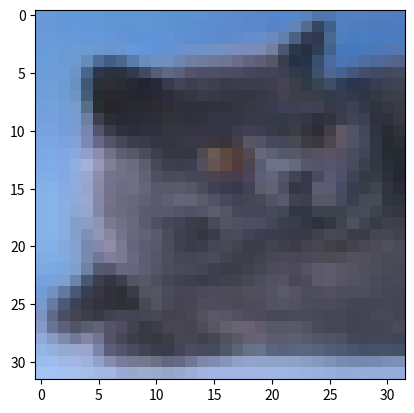

In [34]:
def test(測試編號):
  plt.imshow(x_test[測試編號], cmap='Greys')
  print('神經網路判斷為：', class_name[predicted_classes[測試編號]])
  print('正確答案為：', class_name[np.squeeze(y_test[測試編號])])

#interact_manual(test, 測試編號=(0, len(x_test)-1))
test(7014)